In [2]:
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
filename = 'ultimate_data_challenge.json'
with open(filename) as data_file:
    data = pd.DataFrame(json.load(data_file))
    
logins_filename = 'logins.json'
with open(logins_filename) as data_file:
    logins = pd.DataFrame(json.load(data_file))

In [4]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [6]:
data.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [7]:
logins.isnull().sum()

login_time    0
dtype: int64

In [8]:
len(data)

50000

In [9]:
avg_by_driver = np.mean(data['avg_rating_by_driver'])
avg_by_driver

4.778158195947439

In [10]:
data['avg_rating_by_driver']= data['avg_rating_by_driver'].fillna(int(avg_by_driver))
print(data.isnull().sum())

avg_dist                     0
avg_rating_by_driver         0
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64


In [11]:
avg_of_driver = np.mean(data['avg_rating_by_driver'])
avg_of_driver

4.77502999999973

In [12]:
data['avg_rating_of_driver']= data['avg_rating_of_driver'].fillna(int(avg_of_driver))
print(data.isnull().sum())

avg_dist                    0
avg_rating_by_driver        0
avg_rating_of_driver        0
avg_surge                   0
city                        0
last_trip_date              0
phone                     396
signup_date                 0
surge_pct                   0
trips_in_first_30_days      0
ultimate_black_user         0
weekday_pct                 0
dtype: int64


In [13]:
data['phone'] = data['phone'].fillna('Other')
print(data.isnull().sum())

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
dtype: int64


In [14]:
sorted_cities = data['city'].sort_values()
sorted_cities.head()

49999    Astapor
13706    Astapor
13705    Astapor
33004    Astapor
33009    Astapor
Name: city, dtype: object

In [15]:
cities_counted = sorted_cities.value_counts()
cities_counted = cities_counted.rename_axis("city").reset_index(name = "count")

<BarContainer object of 3 artists>

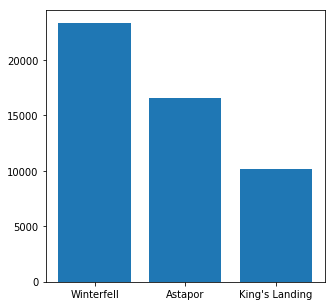

In [16]:
x = list(cities_counted['city'])
y = list(cities_counted['count'])

plt.figure(figsize = (5,5))
plt.bar(x,y)

In [17]:
logins_filename = 'logins.json'
with open(logins_filename) as data_file:
    logins = pd.DataFrame(json.load(data_file))

In [18]:
logins['login_time'] = pd.to_datetime(logins['login_time'])
logins.index = logins['login_time']
logins['count'] = 1

In [19]:
logins_15 = pd.DataFrame(logins['count'].resample('15Min').sum())

In [20]:
logins_15.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


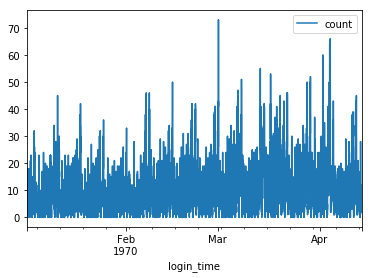

In [21]:
logins_15.plot(kind = "line")

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
        A key measure of success of this experienment is the increase of numbers used during the day or night. If both cities get more traffic during the day and the night, then you'd be able to tell if the vheicles have started using the toll bridge.

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    a. how you will implement the experiment
        The experiment I'd probably look into is through some statistical methods such frequentist inference which would allow me to find the frequency in which cars are used in both cities during the day and the night.
    b. what statistical test(s) you will conduct to verify the significance of the observation
        I'd use A/B testing to verify the singificance. This is so I can compare before and affer to see if there was any significant change in how much each city is being used before and after they implement the toll compensation.
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
        If there is a difference, then I think it would also be fair to see if the total amount of use increases as well. If it doesn't, then toll price isn't a factor in how much people use the service. But if there is some siginificant difference then it would be wise to keep the toll compensation in place. One thing though is I think that the amount people travel from one city to another will be better tellers of whether or not it was significant. That way before and after you can see if people were more willing to travel between cities and see that people are partnerned between.

Question 3

Question 1: perform exploratory analysis on the retained users.

In [22]:
month_trips = data['trips_in_first_30_days'].sort_values()
month_trips.head()

24999    0
24518    0
24515    0
24505    0
24503    0
Name: trips_in_first_30_days, dtype: int64

In [23]:
number_of_days = month_trips.value_counts()
number_of_days = number_of_days.rename_axis("trips_in_first_30_days").reset_index(name = "count_month")

<BarContainer object of 59 artists>

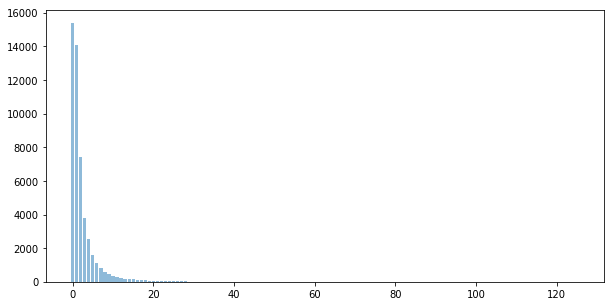

In [24]:
xm = list(number_of_days['trips_in_first_30_days'])
ym = list(number_of_days['count_month'])

plt.figure(figsize = (10,5))
plt.bar(xm, ym, alpha=0.5)

In [25]:
#if the date sign up + 30 is earlier than the last date they used it, then they weren't retained after 30 days

In [26]:
data['signup_date'] = pd.to_datetime(data['signup_date'])

In [27]:
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])

In [28]:
from datetime import date, timedelta


data["signup_date_30"] = data["signup_date"] + timedelta(days=30)
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,signup_date_30
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-02-24
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-02-28
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-02-05
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-02-09
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-02-26


In [29]:
data['signup_date_30'] = pd.to_datetime(data['signup_date_30'])

In [30]:
#retained meaning it was used after 30 days
data['retained'] = ""

data.retained = data['signup_date_30'] < data['last_trip_date']

In [31]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,signup_date_30,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-02-24,True
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-02-28,True
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-02-05,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-02-09,True
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-02-26,True


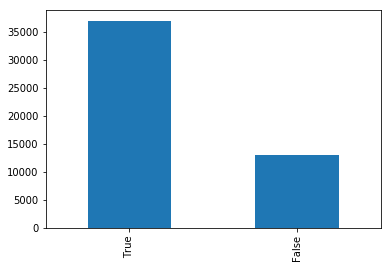

In [32]:
#count of true vs false. True is if the customer is retained. False if they have not been using it after 30 days
data.retained.value_counts().plot(kind = "bar")

In [33]:
#data.retained.plot()

In [34]:
from sklearn.linear_model import LogisticRegression

In [41]:
feature_col = ["trips_in_first_30_days", "weekday_pct"]

X = data[feature_col]
y = data.retained

In [56]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
y_pred = lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[    0  3906]
 [    0 11094]]


In [ ]:
#0+11094 are correct predictions
#0+3906 are incorrect predictions

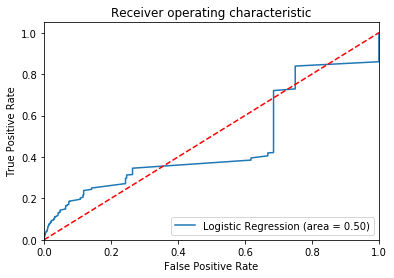

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [74]:
#predictions
predictions = lr.predict(X_test)

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00      3906
        True       0.74      1.00      0.85     11094

   micro avg       0.74      0.74      0.74     15000
   macro avg       0.37      0.50      0.43     15000
weighted avg       0.55      0.74      0.63     15000



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Logistic model was fairly accurate to predict prices for the future. The accuracy was about 74 which means it was more likely than random chance that the model was correctly predicting whether or not users would be retained.